In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.regression import linear_model 
import statsmodels.api as sm
import re

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials



In [3]:
df = pd.read_csv('dataset.csv')

df.drop(columns='Unnamed: 0',inplace=True)

In [8]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Scraping stuff

In [4]:
auth_manager = SpotifyClientCredentials(client_id='1b0f76afafac4d4898811b950e1a0c08',client_secret='806820e9d6004f7c94723ef175ee547c')
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
df['date'] = sp.tracks(list(df['track_id']))

In [5]:
ids = df['track_id'].sample(50).to_frame()

In [ ]:
idl = ids['track_id'].to_list()
idl

In [35]:
df.shape

(114000, 20)

In [14]:
tr = list(df['track_id'])

In [15]:
l = {'track_id':[], 'release_date':[], 'new_popularity':[]}
counter = 0
#playlists = sp.user_playlists('spotify')
for x in tr[0:1000]:
    l['track_id'].append(x) 
    l['release_date'] = sp.track(x)['album']['release_date']
    print(x)
df_dates = pd.DataFrame(l)

df_dates.to_csv('release_dates.csv')

KeyboardInterrupt: 

In [7]:
df1 = pd.DataFrame(l)

df1.to_csv('release_dates.csv')

In [79]:
l

{'track_id': ['5SuOikwiRyPMVoIQDJUgSV',
  '4qPNDBW1i3p13qLCt0Ki3A',
  '1iJBSr7s7jYXzM8EGcbK5b',
  '6lfxq3CG4xtTiEg7opyCyx',
  '5vjLSffimiIP26QG5WcN2K',
  '01MVOl9KtVTNfFiBU9I7dc',
  '6Vc5wAMmXdKIAM7WUoEb7N',
  '1EzrEOXmMH3G43AXT1y7pA',
  '0IktbUcnAGrvD03AWnz3Q8',
  '7k9GuJYLp2AzqokyEdwEw2',
  '4mzP5mHkRvGxdhdGdAH7EJ',
  '5ivF4eQBqJiVL5IAE9jRyl',
  '4ptDJbJl35d7gQfeNteBwp',
  '0X9MxHR1rTkEHDjp95F2OO',
  '4LbWtBkN82ZRhz9jqzgrb3',
  '1KHdq8NK9QxnGjdXb55NiG',
  '6xKeQgzfjixSUld14qUezm',
  '4Yo0igmcoNyat1secaH0OD',
  '2qLMf6TuEC3ruGJg4SMMN6',
  '6CgNoAbFJ4Q4Id4EjtbXlC',
  '3S0OXQeoh0w6AY8WQVckRW',
  '210JCw2LbYD4YIs8GiZ9iP',
  '5TvE3pk05pyFIGdSY9j4DJ',
  '0BUuuEvNa5T4lMaewyiudB',
  '3Hn3LfhrQOaKihdCibJsTs',
  '6D33wCKzWtNEgOovgeVJ7r',
  '5IfCZDRXZrqZSm8AwE44PG',
  '0dzKBptH2P5j5a0MifBMwM',
  '5QAMZTM5cmLg3fHX9ZbTZi',
  '2qESE1ZeWly7I3YjyTXmXh',
  '3EQV1ZHtHvq9OnVRYIdbg3',
  '3ax0rfGb7exLtl02LL08U9',
  '1m5LC29RE52Bxy7hxvpOlL',
  '3H36x7buZdQD4687VmFrwY',
  '0xbMRcMFqxJq1Wa7tvWPtn',
  '6h061

In [6]:
print(sp.track('41dgU6WYpmyi1JfTmYB5L2'))

KeyboardInterrupt: 

In [8]:
df1

,track_id,release_date
0,41dgU6WYpmyi1JfTmYB5L2,2016-06-03
1,1o8MqUvBiDIXxof2TuuPSX,2016-06-03
2,1P8dihTAe2m6zW82CxCUCV,2016-06-03
3,07tP5JoYUg5pRNv9dFw9Xd,2016-06-03
4,3EqfkwoSbO6qnn6Agw085M,2016-06-03
5,7Feaw9WAEREY0DUOSXJLOM,2016-06-03
6,0crd93NUzNm59mYTXPZSGU,2016-06-03
7,7LfDAEzoliTnIeloALma99,2016-06-03
8,0bqwkd3ZJfgzl3lP7Ddof0,2016-06-03
9,7d25Oab5IditBkf8XBnXeK,2016-06-03


In [28]:
df1 = pd.DataFrame()
df1['track_id'] = ids
df1['date'] = [sp.track(x)['album']['release_date'] for x in ids['track_id']]

KeyboardInterrupt: 

In [33]:
df2 = pd.DataFrame()
#df2['track_id'] = idl
df2['date'] = sp.tracks(idl)['album']['release_date']

KeyError: 'album'

In [67]:
l1 = []
for x in range(0,40):
    l1.append(sp.tracks(idl)['tracks'][x]['album']['release_date'])

# Graph Stuff

In [10]:
df1 = df.groupby('track_genre')['popularity'].median().to_frame()

In [11]:
df1.sort_values(by='popularity',ascending=False).head(10).index

Index(['pop', 'pop-film', 'k-pop', 'hip-hop', 'chill', 'metal', 'grunge',
       'sad', 'progressive-house', 'british'],
      dtype='object', name='track_genre')

In [12]:
top10_genres = list(df1.sort_values(by='popularity',ascending=False).head(10).index)

In [13]:
bottom10_genres = list(df1.sort_values(by='popularity',ascending=False).tail(10).index)

In [14]:
#Making sepratee df with only top 10 genres (by median values)
df_top10 = pd.DataFrame()

for x in top10_genres:
    df_top10 = pd.concat([df_top10, df[df['track_genre'].str.fullmatch(x)]])

In [20]:
#Making sepratee df with only bottom 10 genres (by median values)
df_bottom10 = pd.DataFrame()

for x in bottom10_genres:
    df_bottom10 = pd.concat([df_bottom10, df[df['track_genre'].str.fullmatch(x)]])

In [15]:
df1.sort_values(by='popularity',ascending=False).tail(10)

,popularity
track_genre,
reggae,2.0
alternative,1.0
dance,1.0
latin,0.0
soul,0.0
jazz,0.0
romance,0.0
country,0.0
rock,0.0


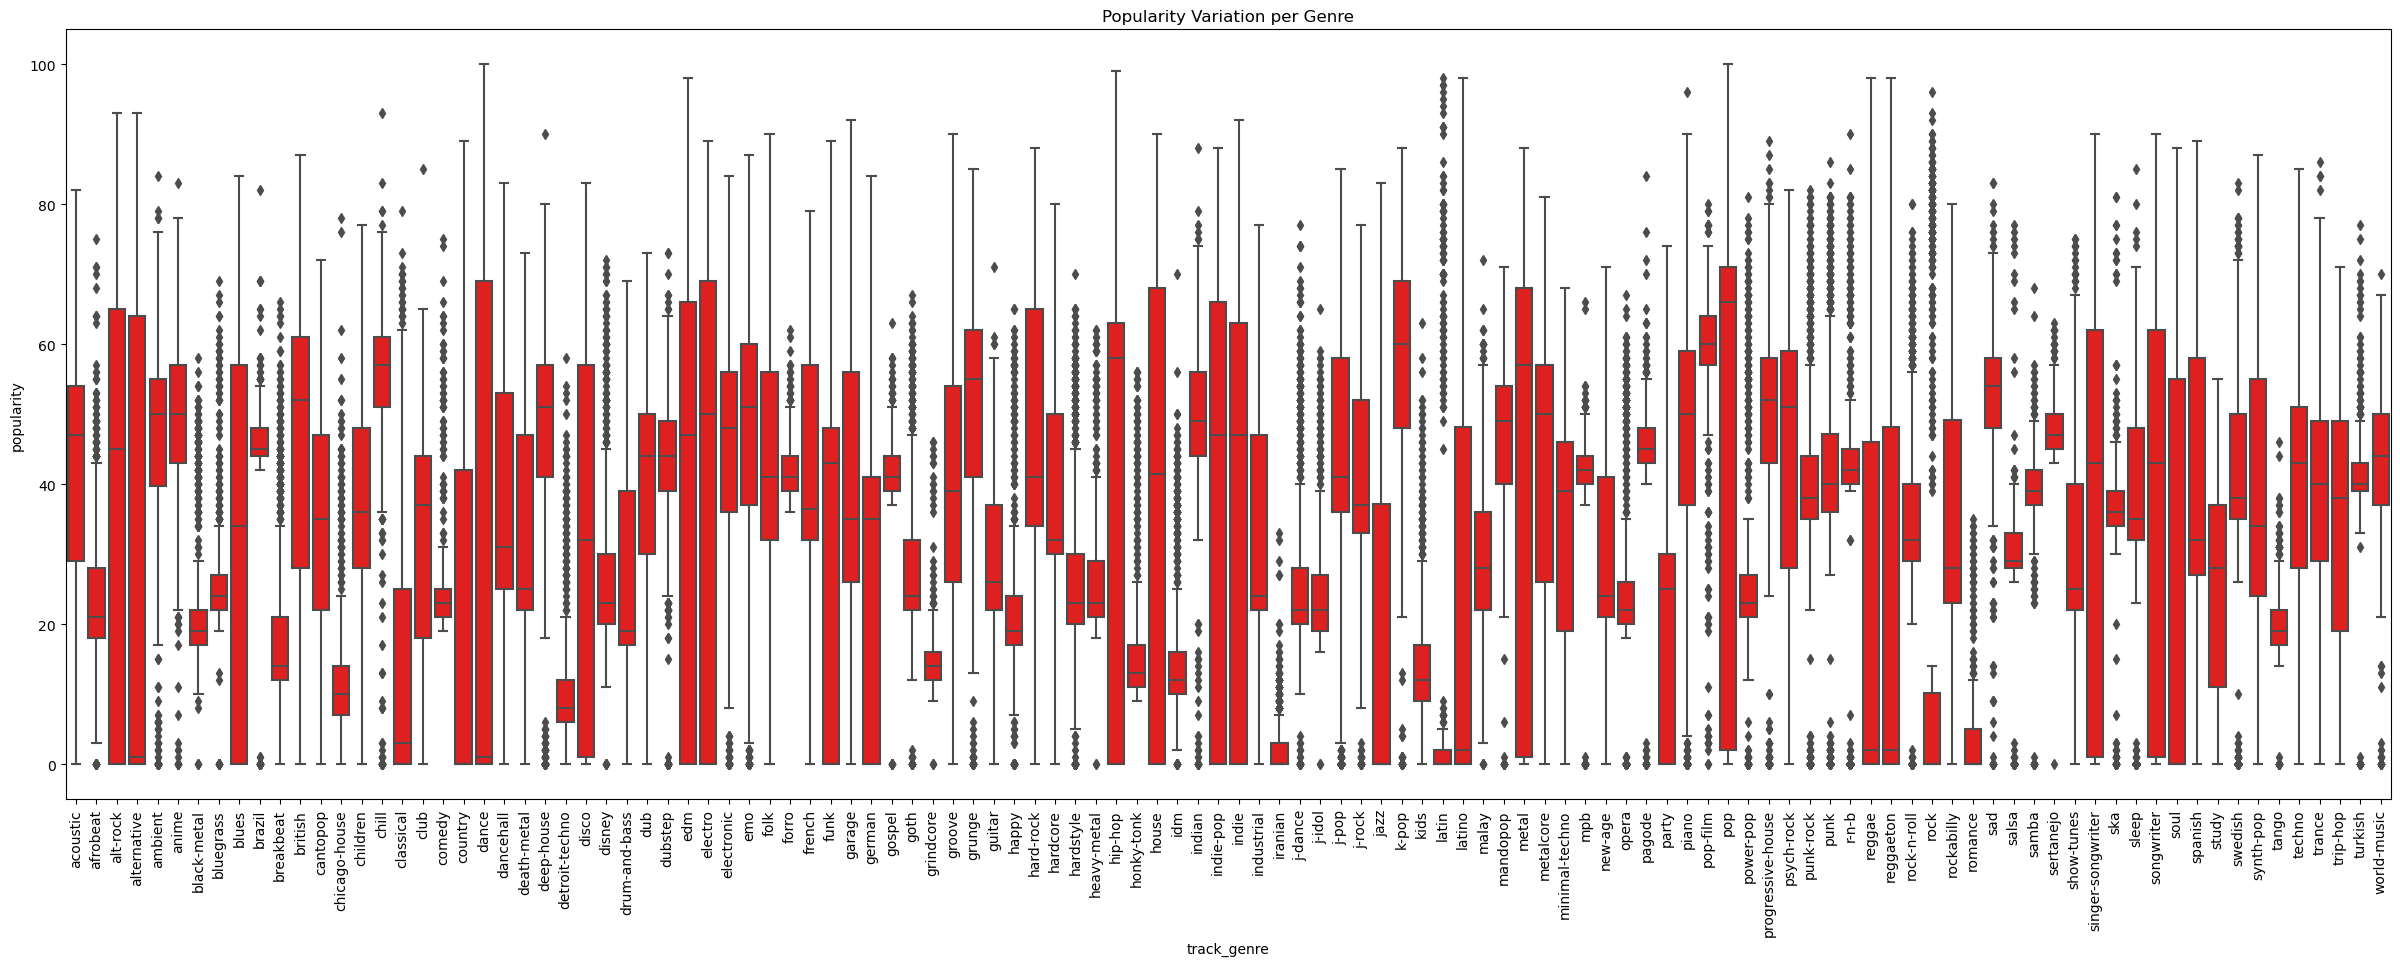

In [16]:
plt.figure(figsize=(30,10))

sns.boxplot(data=df, x='track_genre', y='popularity', color='Red')
plt.xticks(rotation=90)
plt.title('Popularity Variation per Genre')
#plt.savefig('Pop-Genre-Boxplot.png',bbox_inches='tight')
plt.show()

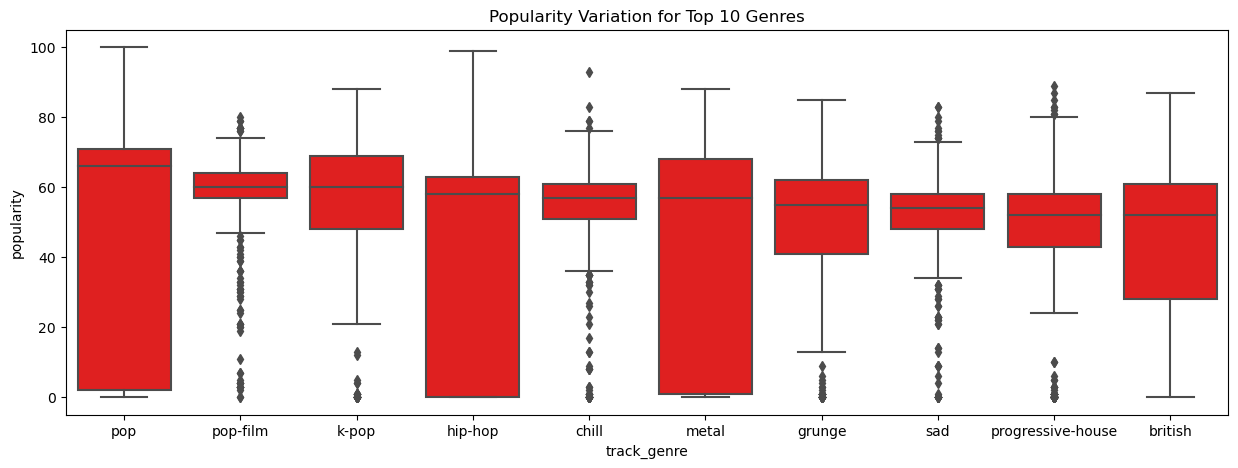

In [18]:
plt.figure(figsize=(15,5))

sns.boxplot(data=df_top10, x='track_genre', y='popularity', color='Red')
plt.xticks(rotation=0)
plt.title('Popularity Variation for Top 10 Genres')
plt.savefig('Top-Pop-Genre-Boxplot.png',bbox_inches='tight')
plt.show()

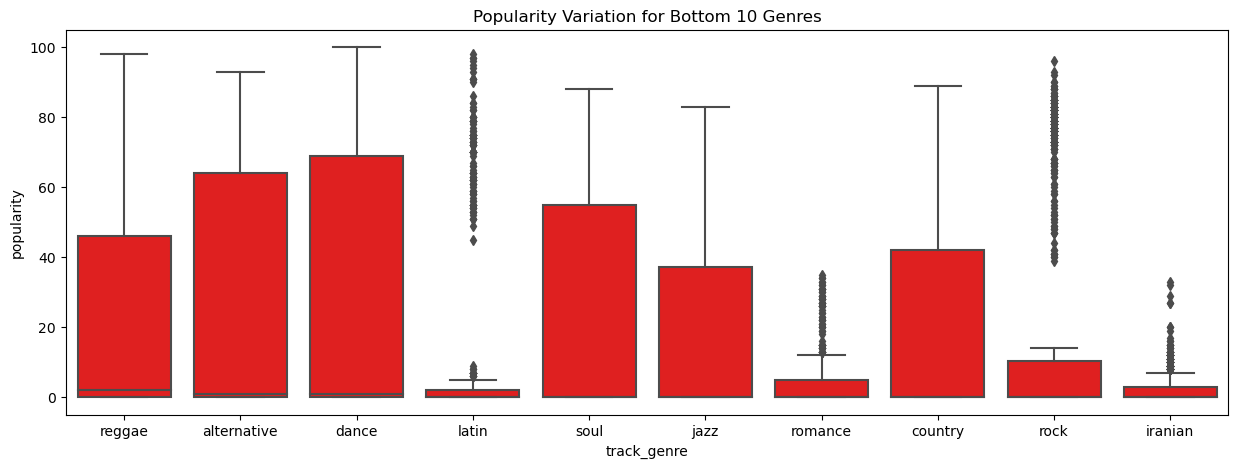

In [21]:
plt.figure(figsize=(15,5))

sns.boxplot(data=df_bottom10, x='track_genre', y='popularity', color='Red')
plt.xticks()
plt.title('Popularity Variation for Bottom 10 Genres')
plt.savefig('Bottom-Pop-Genre-Boxplot.png',bbox_inches='tight')
plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'to_frame'